##  数据可视化
   - matplotlib绘图基础
   - 案例分析：销售记录可视化
   - seaborn数据可视化包

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#设置在notebook中直接展示图形输出
%matplotlib inline 
#设置图片清晰度
%config InlineBackend.figure_format="retina" 

### 1. 绘制正弦函数曲线

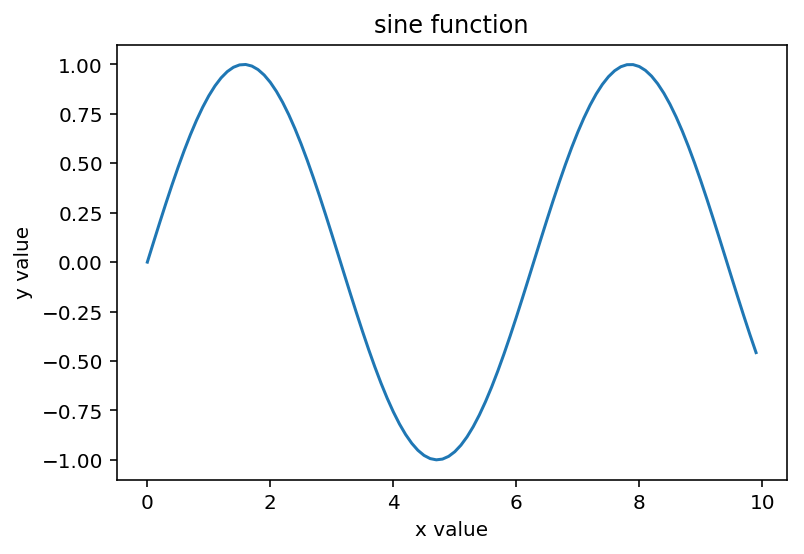

In [2]:
#设置横坐标x取值范围和精度
x=np.arange(0,10,0.1)

#通过sin()函数，得到y值
y=np.sin(x)

#描绘xy，设置完成后使用plt.show()出图
plt.plot(x,y)
plt.title("sine function")
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

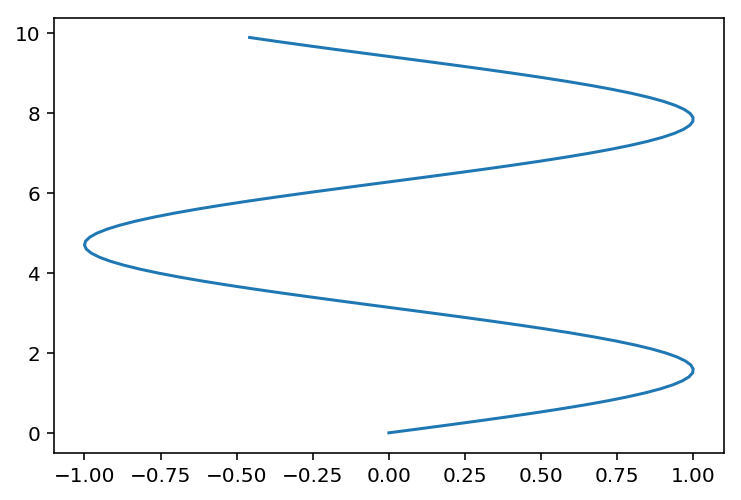

In [3]:
#交换xy位置，观察图
plt.plot(y,x)
plt.show()

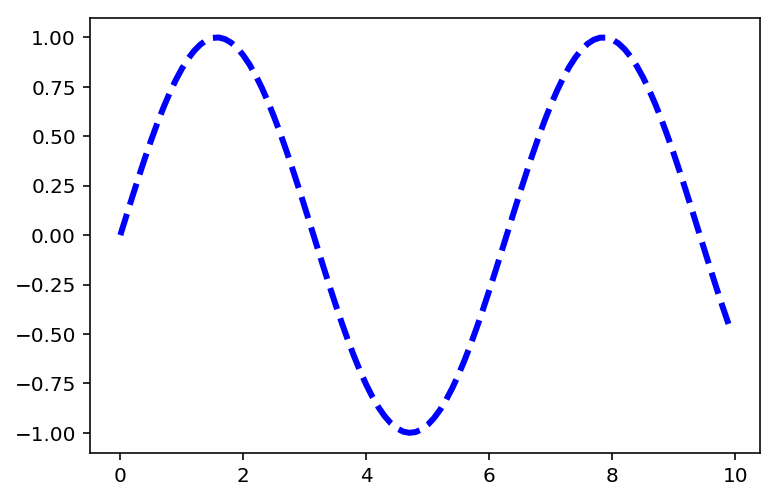

In [4]:
#设置线条格式，如颜色、线型、线宽等
#b蓝色，--虚线，-实线，.点线，.-点划线，+加号线，等等，线型可随意组合，linewidth线宽
plt.plot(x,y,"b--",linewidth=3.0)

Text(2.7,0.5,'DS')

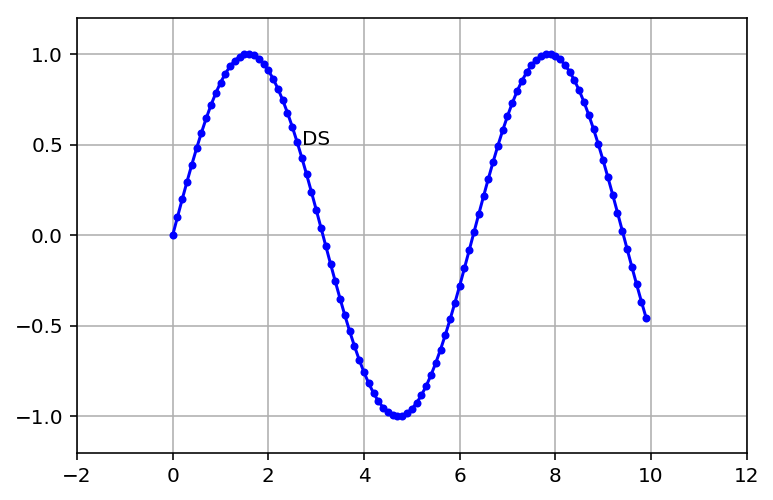

In [5]:
plt.plot(x,y,"b-",marker=".")
#设置x，y轴区间
plt.axis([-2,12,-1.2,1.2])
#设置网格
plt.grid(True)
#在指定坐标加上描述
plt.text(2.7,0.5,"DS")

### 2. 绘制y=x,y=x^2,y=x^3曲线

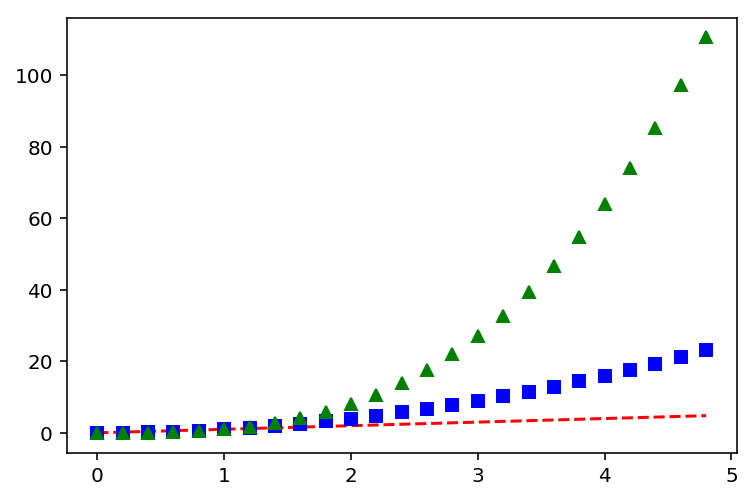

In [6]:
#np.arange函数，对t赋值
t=np.arange(0,5,0.2)

#分别绘制y=x,y=x**2,y=x**3曲线，其中--虚线，s方块，^三角
plt.plot(t,t,"r--",t,t**2,"bs",t,t**3,"g^")

#### 1,2小结
  - 展示了matplotlib的一些基本功能，可通过使用plt自带的函数来控制图形细节，如颜色、线型、标记、线宽，是否添加网格，坐标轴范围等。

### 3. 案列分析：销售记录可视化

In [2]:
df=pd.read_excel("E:\python\sample-salesv3.xlsx")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


这组数据记录了某公司2014年的交易情况
- account number: 账号
- name: 公司名字，与账号有一一对应关系
- sku: 商品货号
- quantity: 购货量
- unit price: 单位价格
- ext price: 总价 = 购货量*单位价格
- date: 日期

In [8]:
df.info() #查看df各字段总数、有无空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
account number    1500 non-null int64
name              1500 non-null object
sku               1500 non-null object
quantity          1500 non-null int64
unit price        1500 non-null float64
ext price         1500 non-null float64
date              1500 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 82.1+ KB


In [9]:
df.describe() #查看df各字段统计值：总数、均值、标准差、最大最小值，四分位数中位数

,account number,quantity,unit price,ext price
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,485957.841333,24.308667,55.007527,1345.856213
std,223974.044572,14.439265,25.903267,1084.914881
min,141962.000000,-1.000000,10.030000,-97.160000
25%,257198.000000,12.000000,32.500000,472.177500
50%,527099.000000,25.000000,55.465000,1050.390000
75%,714466.000000,37.000000,77.075000,2068.330000
max,786968.000000,49.000000,99.850000,4824.540000


In [10]:
#查看数据时发现，购货量有负数，将这些记录筛选出来，根据实际情况决定是否归为异常数据
df[df.quantity<0]
#由于不了解实际情况，目前暂时认为购货量负数为正常值（可从公司名name统计，看看是否是某几个公司出现的情况，是否是退货）

,account number,name,sku,quantity,unit price,ext price,date
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
23,714466,Trantow-Barrows,S1-30248,-1,16.97,-16.97,2014-01-06 18:27:28
146,688981,Keeling LLC,B1-20000,-1,72.18,-72.18,2014-02-04 07:43:51
172,412290,Jerde-Hilpert,S2-34077,-1,37.88,-37.88,2014-02-10 07:12:37
234,424914,White-Trantow,S1-93683,-1,25.01,-25.01,2014-02-27 10:32:25
246,688981,Keeling LLC,B1-86481,-1,97.16,-97.16,2014-03-02 01:46:44
248,307599,"Kassulke, Ondricka and Metz",S1-93683,-1,86.38,-86.38,2014-03-02 03:29:04
376,239344,Stokes LLC,B1-05914,-1,57.02,-57.02,2014-03-31 06:08:18
459,740150,Barton LLC,B1-69924,-1,65.45,-65.45,2014-04-17 08:46:36
537,218895,Kulas Inc,B1-20000,-1,20.53,-20.53,2014-05-06 13:31:26


In [11]:
len(df.name.unique()) #与之交易的公司数量，20个

20

In [12]:
"""按公司名name分组，对各组各字段分别统计：
groupby分组、agg聚合、reset_index重置索引（即重新编号，不用name作为索引）

各公司总订单量(account number count)，
总购货量(quantity sum)，
总交易额(ext price sum)，
交易货号统计(sku unique)"""

dfs=df.groupby("name").agg({"quantity":["sum"],"ext price":["sum"],"account number":["count"],"sku":["unique"]}).reset_index()#.sort_values(by="sum",ascending=False)
dfs.head()

,name,quantity,ext price,account number,sku
,,sum,sum,count,unique
0,Barton LLC,2041,109438.50,82,"[B1-20000, B1-50809, B1-53102, S2-16558, B1-86..."
1,"Cronin, Oberbrunner and Spencer",1673,89734.55,67,"[B1-05914, S2-16558, S1-30248, S1-82801, B1-38..."
2,"Frami, Hills and Schmidt",1903,103569.59,72,"[S2-23246, B1-04202, S2-83881, S1-27722, B1-33..."
3,"Fritsch, Russel and Anderson",2112,112214.71,81,"[S2-82423, B1-53102, B1-53636, S1-27722, S1-93..."
4,"Halvorson, Crona and Champlin",1284,70004.36,58,"[B1-65551, S1-27722, S2-11481, S2-83881, B1-38..."


In [13]:
#将分组聚合后的表格各列重命名
dfs.rename(columns={"name":"Company","account number":"dingdanshu","quantity":"Sale Amount","ext price":"Total Money","sku":"SKU"},inplace=True)
dfs.head()
#dfs.sort_values(by="Total Money",ascending=False)
#想要对dfs销售额列降序排列，看看与哪些公司交易额较高，但排序时报错，暂不明原因。
#可能是聚合多列造成但，准备尝试聚合单列排序

,Company,Sale Amount,Total Money,dingdanshu,SKU
,,sum,sum,count,unique
0,Barton LLC,2041,109438.50,82,"[B1-20000, B1-50809, B1-53102, S2-16558, B1-86..."
1,"Cronin, Oberbrunner and Spencer",1673,89734.55,67,"[B1-05914, S2-16558, S1-30248, S1-82801, B1-38..."
2,"Frami, Hills and Schmidt",1903,103569.59,72,"[S2-23246, B1-04202, S2-83881, S1-27722, B1-33..."
3,"Fritsch, Russel and Anderson",2112,112214.71,81,"[S2-82423, B1-53102, B1-53636, S1-27722, S1-93..."
4,"Halvorson, Crona and Champlin",1284,70004.36,58,"[B1-65551, S1-27722, S2-11481, S2-83881, B1-38..."


### 总销量最多的公司（不是订单数，是quantity）

In [8]:
topqua10=df.groupby('name')['quantity'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)[:10]
topqua10.rename(columns={'name':'Company','sum':'Sale_Amount'},inplace=True)
topqua10

,Company,Sale_Amount
17,Trantow-Barrows,2271
12,Kulas Inc,2265
18,White-Trantow,2258
3,"Fritsch, Russel and Anderson",2112
0,Barton LLC,2041
6,Jerde-Hilpert,1999
2,"Frami, Hills and Schmidt",1903
19,Will LLC,1828
8,Keeling LLC,1806
10,Koepp Ltd,1790


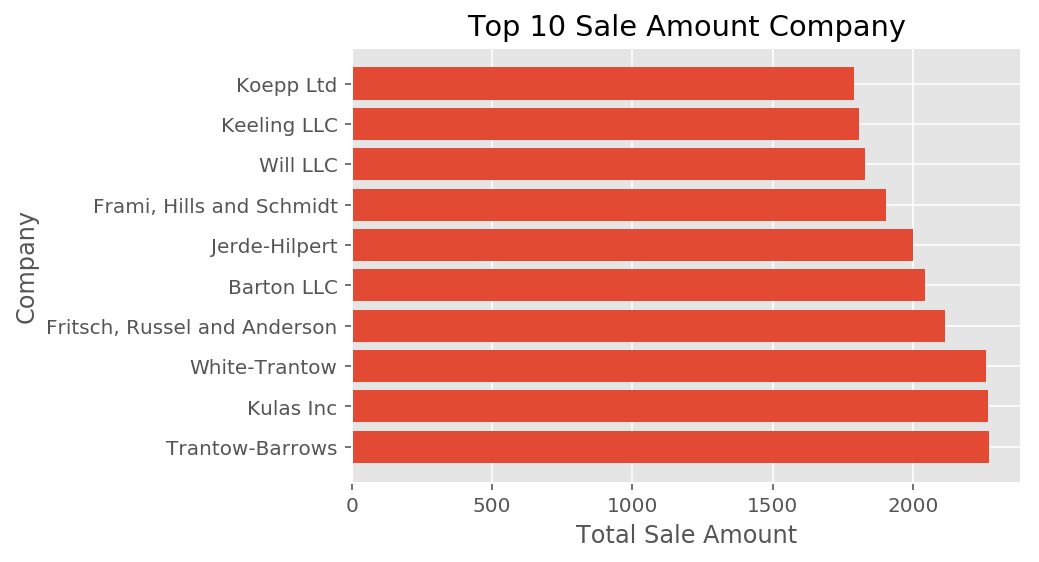

In [20]:
plt.style.use('ggplot')

#作图
plt.barh(np.arange(10),topqua10.Sale_Amount,tick_label=topqua10.Company,height=0.8)

#美化
plt.title('Top 10 Sale Amount Company')
plt.xlabel('Total Sale Amount')
plt.ylabel('Company')

plt.show()

### 总交易额最高的10个公司

In [14]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [3]:
#将df按公司名name分组，对各组交易额ext price求和得到各公司总交易额，计数得到各公司总订单数
#为了不将name作为索引，使用reset_index重置索引
#使用sort_values()对指定列排序
top10=df.groupby('name')['ext price'].agg(['sum','count']).reset_index().sort_values(by='sum',ascending=False)[:10]
top10.rename(columns={'name':'Company','sum':'Sales','count':'Purchases'},inplace=True)
top10

,Company,Sales,Purchases
12,Kulas Inc,137351.96,94
18,White-Trantow,135841.99,86
17,Trantow-Barrows,123381.38,94
6,Jerde-Hilpert,112591.43,89
3,"Fritsch, Russel and Anderson",112214.71,81
0,Barton LLC,109438.50,82
19,Will LLC,104437.60,74
10,Koepp Ltd,103660.54,82
2,"Frami, Hills and Schmidt",103569.59,72
8,Keeling LLC,100934.30,74


### 开始对top10数据可视化展现
   - 条形图：各公司交易额
   - 多图：各公司交易额、订单数
   - 饼图：各公司交易额占比TOP10总额
   - 散点图：各公司订单数-交易额分布

#### 条形图
  - barh水平条形图
  - bar垂直直方图
  - 查看top10公司交易额情况

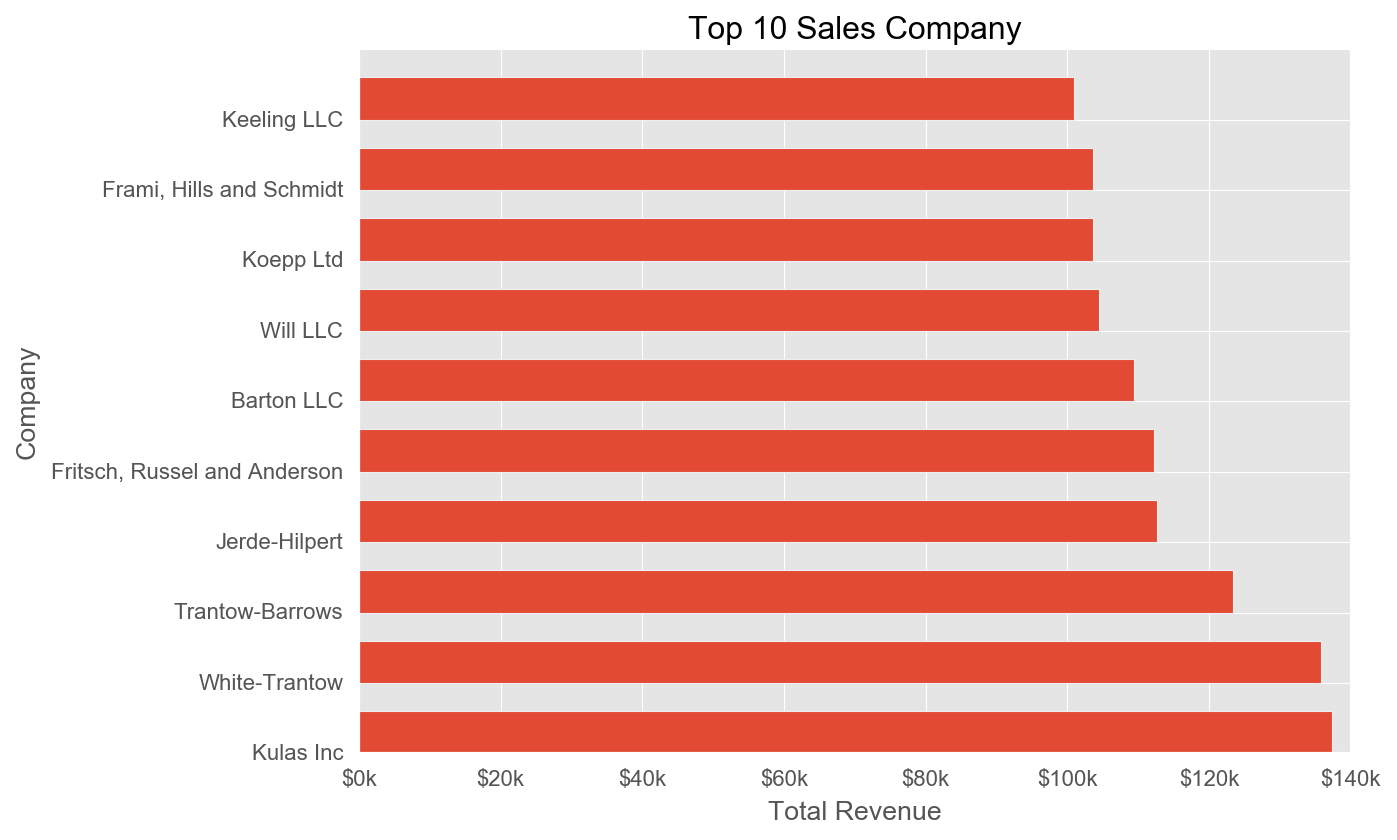

In [32]:
"""使用ggplot风格的作图：
- ggplot2的核心理念是将绘图与数据分离，数据相关的绘图与数据无关的绘图分离
- ggplot2是按图层作图
- ggplot2保有命令式作图的调整函数，使其更具灵活性
- ggplot2将常见的统计变换融入到了绘图中"""
#plt.style.use('dark_background')
#plt.style.use('seaborn')
plt.style.use('ggplot')

#barh绘制水平条形图；bar绘制垂直直方图
"""注意，条形图条数np.arange(10),要与top10.Sales数据数量一致，否则会报错-形状不匹(shape mismatch)"""
plt.barh(np.arange(10),top10.Sales,height=0.6)

#添加标题
plt.title('Top 10 Sales Company')
plt.xlabel('Total Revenue')
plt.ylabel('Company')

#修改纵坐标、横坐标刻度
'''此语句，可用tick_label=top10.Company替代，替代语句放在plt.barh()参数中'''
plt.yticks(np.arange(10),top10.Company) 

plt.xticks([0,20000,40000,60000,80000,100000,120000,140000],
          ['$0k','$20k','$40k','$60k','$80k','$100k','$120k','$140k'])

plt.show()

#### 上图浅析
  - 可以看到，交易额最高的公司是Kulas Inc和White-Trantow公司，达到了近14万美元。
  - 接下来可以从这两家公司订购的商品种类、以及各种类商品采购量入手，分析高交易额的原因，公司偏好-高交易额是因为买的种类多还是某类商品订购量大，同理可分析其他公司
  - 从订单数计算单笔订单交易额，分析客户订购偏好-大批量采购/少量订购

In [23]:
#查看可选的作图风格，ggplot只是风格的一种，可以尝试其他风格的作图
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

### 绘制多图

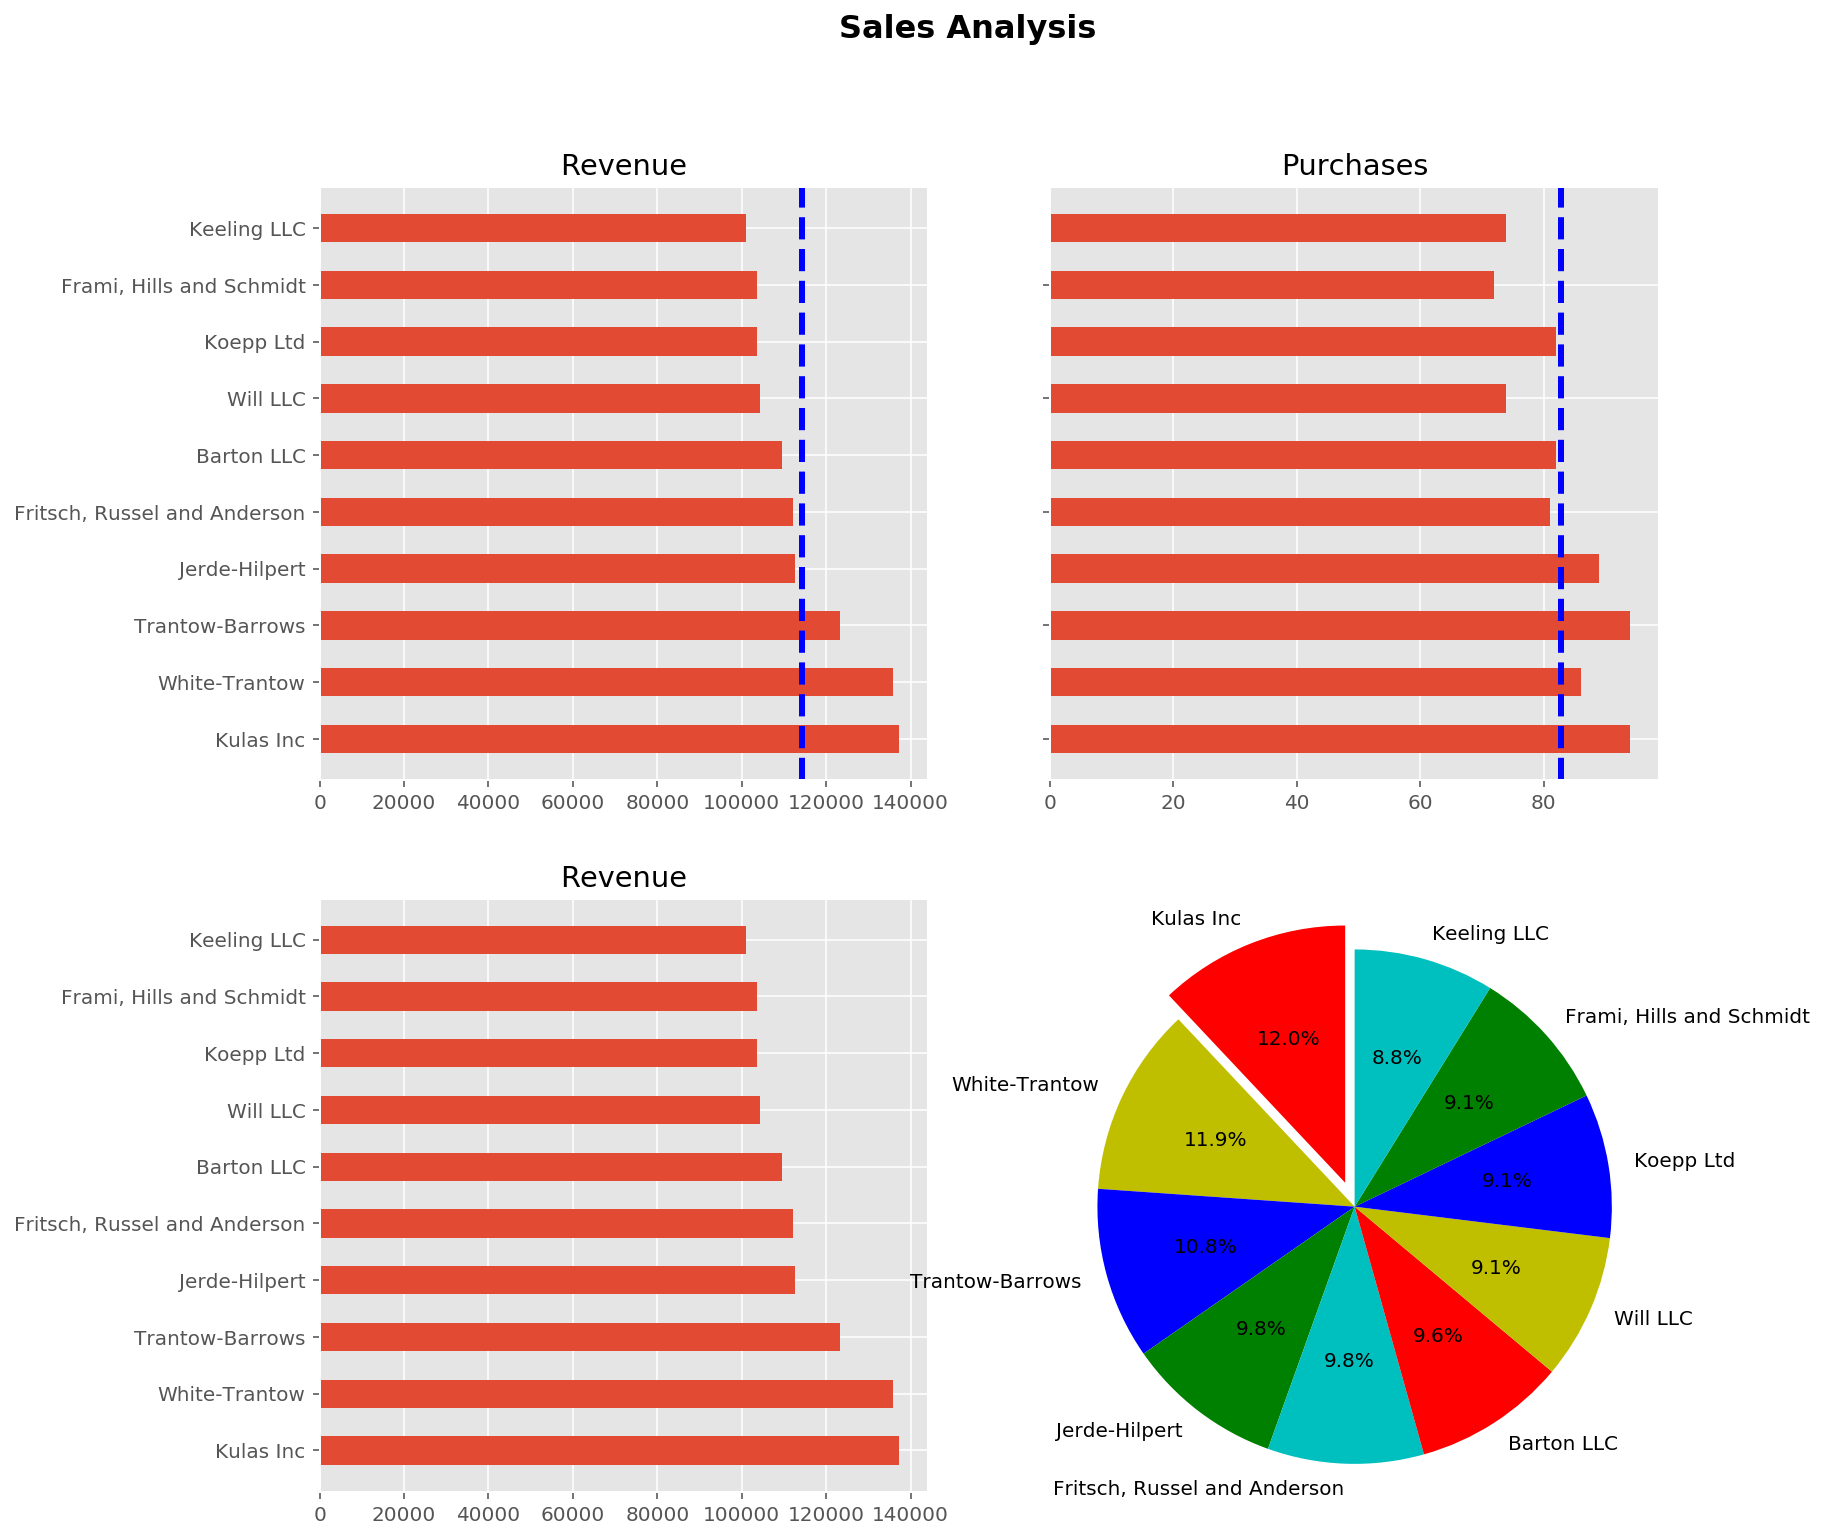

In [6]:
plt.style.use('ggplot')
#设置画布大小
fig=plt.figure(figsize=(12,12))

#加上图像大标题
fig.suptitle('Sales Analysis',fontsize=16,fontweight='bold')

#fig.add_subplot(x,y,z),表示将画布分为x行,y列,当前图像放在从左到右、从上到下的第z个位置

#添加第一个子图
ax1=fig.add_subplot(2,2,1)
plt.barh(np.arange(10),top10.Sales,height=0.5,tick_label=top10.Company)
plt.title('Revenue')

#加入平均销售额线  plt.axvline()表示添加垂直线axis vertical line
revenue_avg=top10.Sales.mean()
plt.axvline(x=revenue_avg,color='b',linestyle='--',linewidth=3)


#添加第二个子图
ax2=fig.add_subplot(222)
plt.barh(np.arange(10),top10.Purchases,height=0.5)
plt.title('Purchases')

#设置不显示y轴刻度
plt.yticks(visible=False)

#加入平均订单数线
Purchases_avg=top10.Purchases.mean()
plt.axvline(x=Purchases_avg,color='b',linestyle='--',linewidth=3)

#加入第三个、第四个子图
ax3=fig.add_subplot(223)
plt.barh(np.arange(10),top10.Sales,height=0.5,tick_label=top10.Company)
plt.title('Revenue')

ax4=fig.add_subplot(224)
plt.pie(top10.Sales,labels=top10.Company,
        colors=['r','y','b','g','c','r','y','b','g','c'],
        startangle=90,
        explode=(0.1,0,0,0,0,0,0,0,0,0),
        autopct='%1.1f%%')
plt.axis('equal')

plt.show()

### 饼图
  - top10公司，销售额占比

(-1.0054549589099633,
 1.0041240564764455,
 -1.0030160718500458,
 1.0929633487133668)

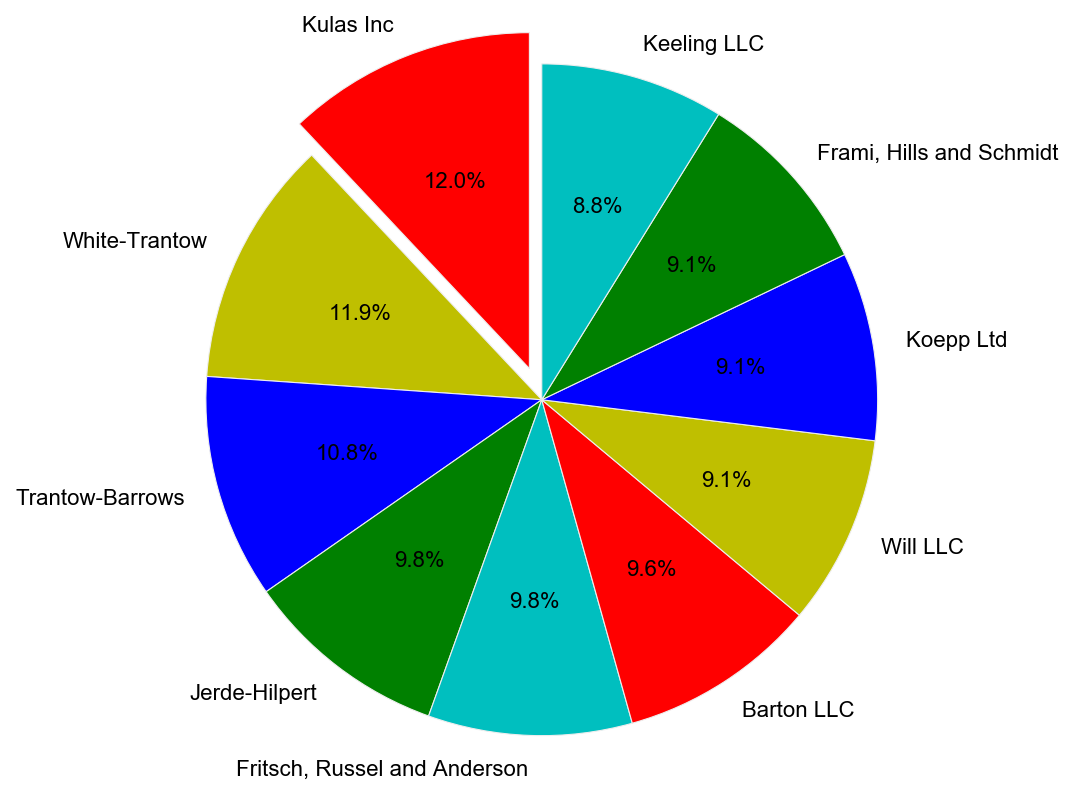

In [78]:
#plt.pie()绘制饼图
"""
labels代表每个扇区的标签，
colors=['b','g'],设置扇区颜色
startangle代表起始位置角度
explode=(0.1,0,0,0,0,0,0,0,0,0)代表将第一个扇区拉出来0.1，作为突出显示
autopct='%1.1f%%',代表给出每个扇区的占比 ，精确到小数点后1位
"""
plt.pie(top10.Sales,labels=top10.Company,
        colors=['r','y','b','g','c','r','y','b','g','c'],
        startangle=90,
        explode=(0.1,0,0,0,0,0,0,0,0,0),
        autopct='%1.1f%%')
plt.axis('equal')

### 散点图
   - top10公司中，各公司销售额与订单数的关系，展示各公司交易习惯-偏好大订单还是小额订单

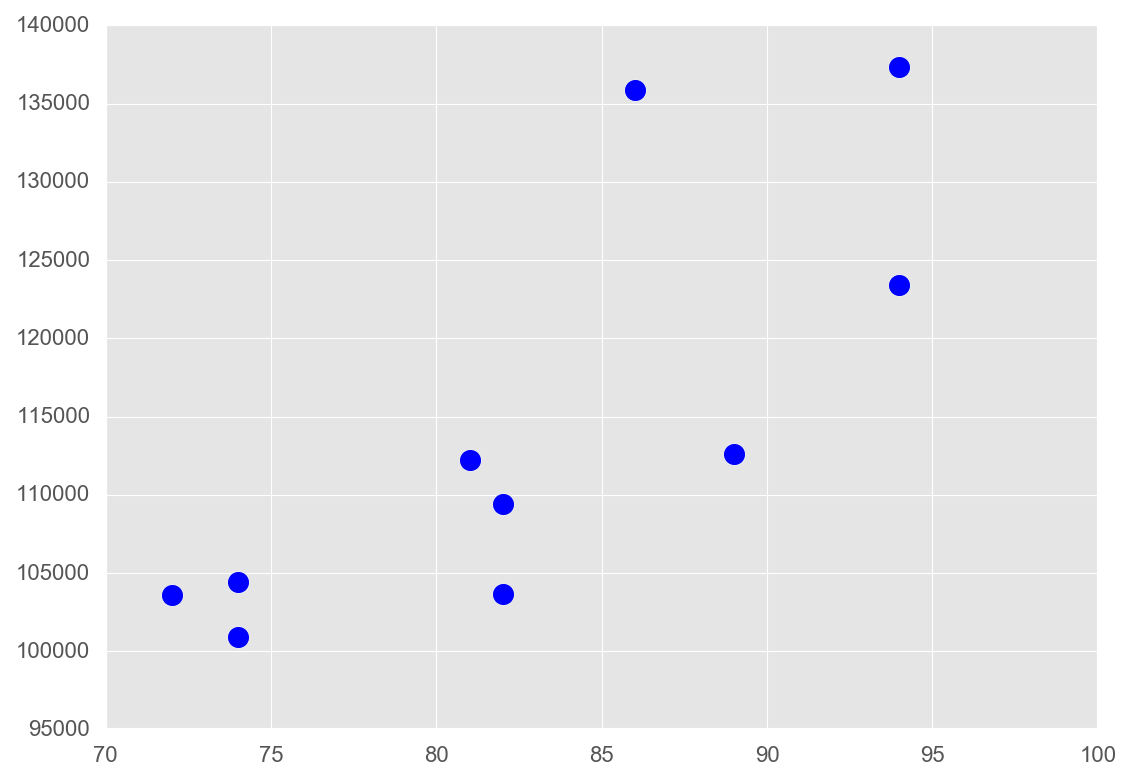

In [93]:
plt.style.use('ggplot')
#scatter绘制散点图，s设置点大小
plt.scatter(x=top10.Purchases,y=top10.Sales,s=100)
plt.show()

### 直方图
  - 对于原始数据df中，每笔订单的交易额(ext price)，统计单笔订单交易额分布情况

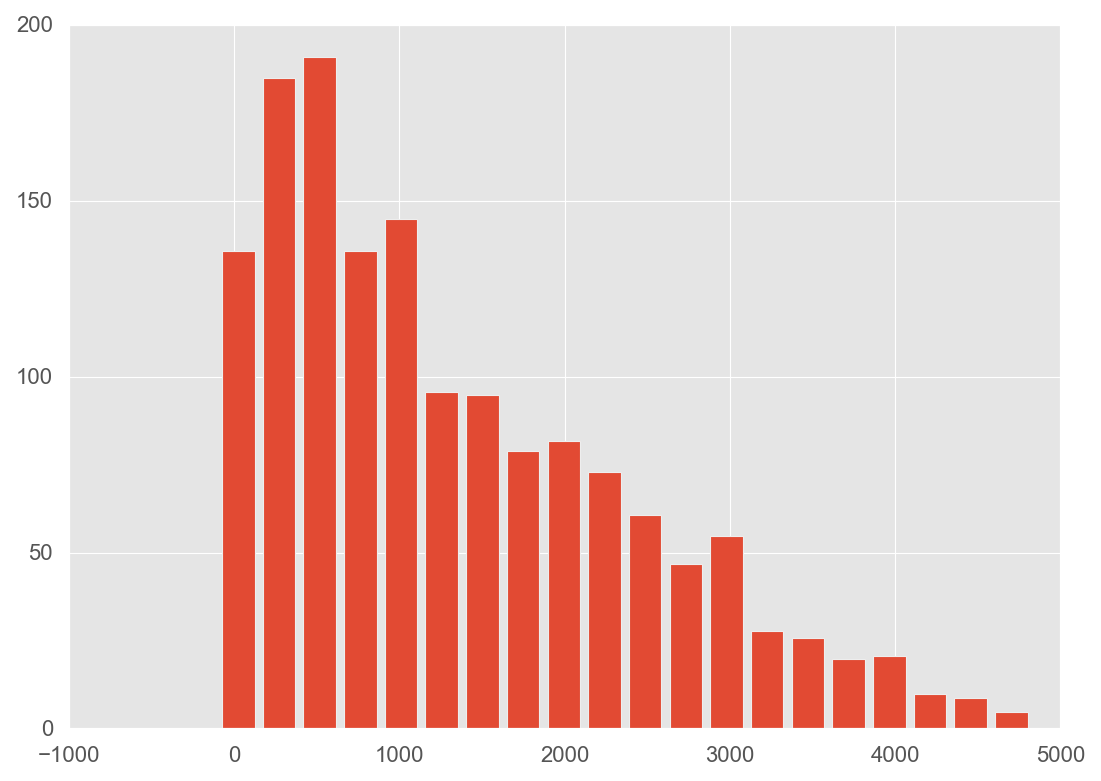

In [108]:
#hist绘制直方图，bins设置区间个数
plt.hist(df['ext price'],bins=20,rwidth=0.8)

#plt.xlim(-200, 5000)
plt.show()

- 可以看到，单笔订单交易额在200~600美元的订单最多，可以从一方面反映客户的下单偏好-小额订单。

- 当然，更有价值的分析应该下沉到各公司的单笔订单金额去分析，这里暂不做展开。

### 小结
  - 以上可视化主要利用matplotlib，主要涉及到条形图barh bar，直方图hist，饼图pie，散点图scatter，多图fig.add_subplot
  - 作图代码千千万，要收集整理，用以致学